<a href="https://colab.research.google.com/github/BaichooSiddharth/Devoir_1_Data_Science/blob/master/Devoir_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **LOAD DATA**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!unzip -uq "/content/drive/My Drive/Colab Notebooks/IFT-3700/PATCH.amat.zip" -d "/content/drive/My Drive/Colab Notebooks/IFT-3700" 

"""
les données se trouvent dans le drive des étudiants dans une version zip
"""

Mounted at /content/drive


'\nles données se trouvent dans le drive des étudiants dans une version zip\n'

In [11]:
import numpy as np
import matplotlib.pyplot as plt


#QUESTION 1)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

#QUESTION 2)

#QUESTION 3)
import matplotlib.image as mpimg

#QUESTION 4)


## Question 1

Cette question est une compétition entre les équipes et sera évaluée en fonction de la précision du classifieur produit par chaque équipe. Les données sont contenues dans le fichier PATCH.amat et il s’agit de 50000 images (28 x 28) en noir et blanc codées en binaire. Les images sont abstraites et appartiennent à deux catégories distinctes. Le fichier contient une image par ligne et chaque ligne commence par 784=28 * 28 bits associés à la couleur des pixels et suivi d’un bit représentant la classe. Le codage du fichier est lisible, mais nécessite un prétraitement pour être utilisé. L’équipe doit produire un classifieur qui sera mis en production et évalué sur des données fraîches non disponibles à l’équipe (mais qui ont exactement la même distribution). Les équipes avec une solution minimalement raisonnable seront classées en ordre de précision et le rang sera transformé en note variant de 10 à 25 sur 25.

In [4]:
'''
On va implémenter un CNN pour la classification des images code basé de https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/
'''

data = np.loadtxt('/content/drive/My Drive/Colab Notebooks/IFT-3700/PATCH.amat')

X_train, X_test = train_test_split(data, test_size = 0.2)

In [6]:
X_value_train = X_train[:, 1:]
X_labels_train = X_train[:, 0]
X_value_test = X_test[:, 1:]
X_labels_test = X_test[:, 0]
X_value_train = X_value_train.reshape(X_value_train.shape[0], 28, 28, 1)
X_value_test = X_value_test.reshape(X_value_test.shape[0], 28, 28, 1)

In [15]:
n_classes = len(np.unique(X_labels_test))
print("Shape before one-hot encoding: ", X_labels_train.shape)
Y_train = np_utils.to_categorical(X_labels_train, n_classes)
Y_test = np_utils.to_categorical(X_labels_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


reconstructed_model = load_model("/content/drive/My Drive/Colab Notebooks/IFT-3700")
reconstructed_model.fit(X_value_test, Y_test)

Shape before one-hot encoding:  (40000,)
Shape after one-hot encoding:  (40000, 2)
313/313 [==============================] - 5s 16ms/step - loss: 0.0332 - accuracy: 0.9896


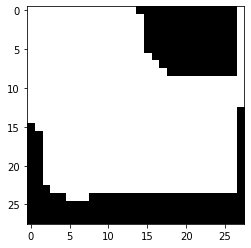

In [16]:
plt.imshow(np.reshape(X_value_test[0], (28, 28)), cmap="gray")


L'accuracy de notre CNN est arrivé à 98.96 %.  Pour tester de nouvelles données, il faut juste remplacer les valeurs de X_value_test dans "reconstructed_model.fit(X_value_test, Y_test)" par les valeurs que l'on veut tester et on peut donner les nouveaux labels de notre nouvel ensemble de test en les mettant à la place de Y_test 

## Question 2 
Imaginez qu’on vous donne un fichier contenant des données de nature astronomique. Il s’agit de données concernant 6500 milliards d’étoiles. Les données (dépassant la centaine de téraoctets) sont réparties sur 300 serveurs avec un accès rapide au disque et une bonne capacité de calcul. La connexion entre les serveurs est rapide, mais pas exceptionnelle.

Les données pour chaque étoile comporte, la position dans l’espace (x,y,z), la luminosité apparente de l’étoile et sa catégorie (10 catégories possibles). Aussi, pour chaque étoile une liste de ses caractéristiques physiques représentées par 22 nombres réels est incluse.

Proposez une approche distribuée qui permet de répondre aux questions suivantes et expliquez en détail toute la démarche permettant leur résolution.
Trouvez les 1000 paires d’étoiles les plus proches (distance euclidienne de la position).
Comptez combien d'étoiles il y a dans chaque catégorie.
Produisez un classifieur qui, étant donné le vecteur de caractéristiques (22 nombres réels), prédit la catégorie de l’étoile.


**1. Trouver les 1000 paires**

Premièrement il faut trouver les 1000 étoiles les plus proches de la terre sur chacun des 300 serveurs (pas moins car il se peut que les 1000 étoiles les plus proches se trouvent sur le même serveur).  Puis on envoie les 1000 étoiles les plus proches sur chacun des serveurs (3000000 d'étoiles <<< 6.5 trilliards étoiles) sur une machine avec une assez grande capacité puis on choisit les 1000 les plus proches parmi ces 3000000 étoiles. (Distance euclidienne = sqrt(x^2 + y^2 + z^3))

**2. Compter le nombre d'étoiles dans chaque catégorie**

Premièrement on compte le nombre de labels différents sur chacun des serveurs (comme on a 10 catégories ce sera plus simple après cela). Puis on envoie les résultats obtenus sur chacun des serveurs dans une seule machine (on a 3000 valeurs en tout, 10 pour chacun des serveurs donc le problème de communication est moindre). Comme cela on peut compter le nombre d'occurence de chacune des type d'étoiles

**3. Classifieur pour les 22 caractéristiques**


On entraîne chacun des serveurs avec un différent modèle (70% entrainement, 15% validation, 15% test) (pas besoin de 300 modèles différents mais on fait cela pour voir quel modèle correspondra mieux au jeu de données). Puis on choisit les 11 meilleurs modèles parmi les serveurs. Puis pour une nouvelle étoile on fait passer sur les modèles puis on fait un vote de majorité (11 classes pour couper au cas ou on a des égalités) 

## Question 3

Expliquez en détail comment utiliser un classifieur binaire, capable d’apprendre à effectuer la classification de deux catégories, pour réaliser la classification dans un contexte ou plusieurs catégories doivent être distinguées. Considérez le cas à 3, 25, 12500 catégories et faite le contraste entre les différentes approches étudiées et le nombre de catégories.


Si nous nous retrouvons avec 3, 25, 12500, nous avons un problème de classification multi-classe donc non binaire.

Mais nous pouvons réduire ce problème en problème de classfication binaire en utilisant la technique *One vs. All* . On transforme **N-classes** en **N modèles de classifcations binaires**

Dans la classification one-vs-All, pour l'ensemble de données des instances de classe N, nous devons générer les modèles de classificateurs N-binaires. Le nombre d'étiquettes de classe présentes dans l'ensemble de données et le nombre de classificateurs binaires générés doivent être identiques.

Dans le cas de **3 catégories**, on a l'illustration ci-dessous:

In [ ]:
plt.imshow(mpimg.imread("svm.png"))
plt.title("Exemple de One-vs-all")

FileNotFoundError: ignored

Comme le montre l'image ci-dessus, considérons que nous avons trois classes, par exemple, le type 1 pour le vert, le type 2 pour le bleu et le type 3 pour le rouge.

Maintenant, comme on vous l'a dit plus tôt, nous devons générer le même nombre de classificateurs que les étiquettes de classe sont présentes dans l'ensemble de données, nous devons donc créer ici trois classificateurs binaires pour trois classes respectives.



*   Classificateur 1:- [Vert] vs [Rouge, Bleu]
* Classificateur 2 : [Bleu] vs [Vert, Rouge]
* Classificateur 3 : [Rouge] vs [Bleu, Vert]



Nous pourrons maintenant implémenter un algorithme pour la classification binaire (e.g.: Support de vecteurs machine) pour chaque Classificateur *i, i = 1,2,3*.

Cette approche exige que chaque modèle prévoie une probabilité d'appartenance à une classe ou un score de type probabiliste. L'argmax de ces scores (indice de classe avec le score le plus élevé) est ensuite utilisé pour prédire une classe.

## Question 4
Faites une analyse des patrons existants dans le jeu de données adulte. Il est possible que le regroupement de valeurs pour certaines caractéristiques donne des résultats intéressants. Vous devez aussi discuter de l’aspect éthique concernant l’utilisation des patrons obtenus.
